# Image Classification - Lab

## Introduction

Now that you have a working knowledge of CNNs and have practiced implementing associated techniques in Keras, its time to put all of those skills together. In this lab, you'll work to complete a [Kaggle competition](https://www.kaggle.com/c/dog-breed-identification) on classifying dog breeds.


## Objectives

In this lab you will: 

- Compare and apply multiple techniques for tuning a model using data augmentation and pretrained models  

## Download and Load the Data

Start by downloading the data locally and loading it into a Pandas DataFrame. Be forewarned that this dataset is fairly large and it is advisable to close other memory intensive applications.

The data can be found [here](https://www.kaggle.com/c/dog-breed-identification/data).

It's easiest if you download the data into this directory on your local computer. From there, be sure to uncompress the folder and subfolders. If you download the data elsewhere, be sure to modify the file path when importing the file below.

In [1]:
# No code per se, but download and decompress the data

## Preprocessing

Now that you've downloaded the data, its time to prepare it for some model building! You'll notice that the current structure provided is not the same as our lovely preprocessed folders that you've been given to date. Instead, you have one large training folder with images and a csv file with labels associated with each of these file types. 

Use this to create a directory substructure for a train-validation-test split as we have done previously. Also recall that you'll also want to use one-hot encoding as you are now presented with a multi-class problem as opposed to simple binary classification.

In [2]:
# Your code here; open the labels.csv file stored in the zip file
import pandas as pd

In [3]:
ls

Baseline_CNN.h5                  history_vgg19_10epochs.pickle
Baseline_CNN_dog_subset_run2.h5  index.ipynb
CONTRIBUTING.md                  multiclass_cnfmatx.png
LICENSE.md                       vgg19_3breeds_4epochs.h5
README.md                        vgg19_FE_AUG_10epochs.h5
data_org_subset/                 vgg19_FE_AUG_15epochs.h5
dog-breed-identification/


In [4]:
ls dog-breed-identification/

labels.csv*            test/
sample_submission.csv* train/


In [5]:
df = pd.read_csv('dog-breed-identification/labels.csv')
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [7]:
ls dog_breeds/train/ | head -5

000bec180eb18c7604dcecc8fe0dba07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg
001cdf01b096e06d78e9e5112d419397.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg



In order to input the data into our standard pipeline, you'll need to organize the image files into a nested folder structure. At the top level will be a folder for the training data, a folder for the validation data, and a folder for the test data. Within these top directory folders, you'll then need to create a folder for each of the categorical classes (in this case, dog breeds). Finally, within these category folders you'll then place each of the associated image files. To save time, do this for just 3 of the dog breeds such as `'boston_bull'`, `'toy_poodle'`, and `'scottish_deerhound'`.

You're nested file structure should look like this:
* train
    * category_1
    * category_2
    * category_3
    ...
* val
    * category_1
    * category_2
    * category_3
    ...
* test 
    * category_1
    * category_2
    * category_3
    ...  

> **Hint**: To do this, you can use the `os` module which will you can use to execute many common bash commands straight from your python interpreter. For example, here's how you could make a new folder: 

```python
import os
os.mkdir('New_Folder_Name')
```
Start by creating top level folders for the train, validation, and test sets. Then, use your pandas DataFrame to split the example images for each breed of dog into a 80% train set, and 10% validation and test sets. Use `os.path.join()` with the information from the DataFrame to construct the relevant file path. With this, place the relevant images using the `shutil.copy()` into the appropriate directory. 

>> **Note**: It is worthwhile to try this exercise on your own, but you can also use the images stored under the `'data_org_subset/'` folder of this repository, in which the Kaggle dataset has already been subset and preprocessed.

In [7]:
print('Number of unique breeds:', df.breed.nunique())
print(df.breed.value_counts()[:10])

Number of unique breeds: 120
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
shih-tzu                112
great_pyrenees          111
pomeranian              111
basenji                 110
samoyed                 109
Name: breed, dtype: int64


In [10]:
# Your code here; transform the image files and then load them into Keras as tensors 
# (be sure to perform a train-val-test split)
import os, shutil
import numpy as np

old_dir = 'dog-breed-identification/train/'
new_root_dir = 'data_subset_work/'

os.mkdir(new_root_dir)

dir_names = ['train', 'val', 'test']
for d in dir_names:
    new_dir = os.path.join(new_root_dir, d)
    os.mkdir(new_dir)

for breed in ['boston_bull', 'toy_poodle', 'scottish_deerhound']:
    print('*****',breed, '*****')
    for d in dir_names:
        new_dir = os.path.join(new_root_dir, d, breed)
        os.mkdir(new_dir)
    # subset into train, validation, and test sets
    temp = df[df.breed == breed]
    train, validate, test = np.split(temp.sample(frac=1),
                                     [int(.8*len(temp)),
                                      int(.9*len(temp))])
    print('Split {} igs into {} train, {} val and {} test'.format(len(temp),
                                                                  len(train),
                                                                  len(validate),
                                                                  len(test)))

    for i, temp in enumerate([train, validate, test]):
        for row in temp.index:
            filename = temp['id'][row] + '.jpg'
            origin = os.path.join(old_dir + filename)
            destination = os.path.join(new_root_dir + dir_names[i] + '/' +
                                       breed + '/' + filename)
            shutil.copy(origin, destination)

***** boston_bull *****
Split 87 igs into 69 train, 9 val and 9 test
***** toy_poodle *****
Split 80 igs into 64 train, 8 val and 8 test
***** scottish_deerhound *****
Split 126 igs into 100 train, 13 val and 13 test


In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = '{}train'.format(new_root_dir)
validation_dir = '{}val'.format(new_root_dir)
test_dir = '{}test'.format(new_root_dir)

# rescale all images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical')

Using TensorFlow backend.


Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [12]:
train_generator.class_indices

{'boston_bull': 0, 'scottish_deerhound': 1, 'toy_poodle': 2}

## Optional: Build a Baseline CNN

This is an optional step. Adapting a pretrained model will produce better results, but it may be interesting to create a CNN from scratch as a baseline. If you wish to, do so here.

In [15]:
# Create a baseline CNN model
import datetime
from keras import layers, models, optimizers

original_start = datetime.datetime.now()
start = datetime.datetime.now()


model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

end = datetime.datetime.now()
elapsed = end - start
print('Runtime: {}'.format(elapsed))

Epoch 1/10
100/100 [==============================] - 81s 808ms/step - loss: 1.0262 - acc: 0.4825 - val_loss: 1.0284 - val_acc: 0.6000
Epoch 2/10
100/100 [==============================] - 79s 792ms/step - loss: 0.7858 - acc: 0.6588 - val_loss: 0.6726 - val_acc: 0.5333
Epoch 3/10
100/100 [==============================] - 89s 894ms/step - loss: 0.5674 - acc: 0.7881 - val_loss: 0.8994 - val_acc: 0.6333
Epoch 4/10
100/100 [==============================] - 83s 831ms/step - loss: 0.4122 - acc: 0.8405 - val_loss: 1.2383 - val_acc: 0.7667
Epoch 5/10
100/100 [==============================] - 84s 840ms/step - loss: 0.2591 - acc: 0.9040 - val_loss: 0.8562 - val_acc: 0.7667
Epoch 6/10
100/100 [==============================] - 84s 836ms/step - loss: 0.1651 - acc: 0.9496 - val_loss: 2.1451 - val_acc: 0.6667
Epoch 7/10
100/100 [==============================] - 86s 857ms/step - loss: 0.0822 - acc: 0.9819 - val_loss: 2.4954 - val_acc: 0.7000
Epoch 8/10
100/100 [==============================] - 8

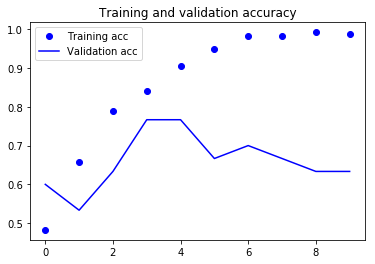

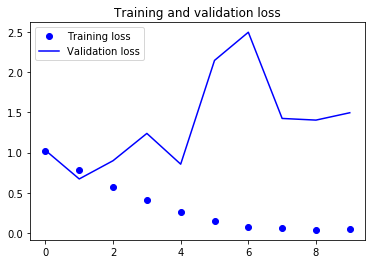

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
model.save('Basline_CNN_dog_subset_WORK.h5')

In [20]:
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical',
    shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 30 images belonging to 3 classes.
Generated 810 predictions
test acc: 0.800000011920929


## Loading a Pretrained CNN

## Feature Engineering with the Pretrained Model

As you may well have guessed, adapting a pretrained model will undoubtedly produce better results then a fresh CNN due to the limited size of training data. Import a pretrained model such as VGG-19 to use a convolutional base. Use this to transform the dataset into a rich feature space and add a few fully connected layers on top of the pretrained layers to build a classification model. (Be sure to leave the pretrained model frozen!)

In [22]:
# Your code here; add fully connected layers on top of the convolutional base
from keras.applications import VGG19

# initalize base
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(240, 240, 3))

model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

cnn_base.trainable = False

# check whether a layer in trainable
for layer in model.layers:
    print(layer.name, layer.trainable)

# check how many trainable weights are in the model
print(len(model.trainable_weights))

model.summary()

vgg19 False
flatten_2 True
dense_6 True
dense_7 True
dense_8 True
dense_9 True
dense_10 True
10
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
________________________

In [24]:
start = datetime.datetime.now()


# preprocessing/problem setup
# get all the data in the directory train, val, test and reshape
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                  fill_mode='nearest') 

test_datagen = ImageDataGenerator(rescale=1./255) 


train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(240,240),
    batch_size=20,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size=(240,240),
    batch_size=20,
    class_mode='categorical')

test_images, test_labels = next(test_generator)

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit_generator(train_generator,
                              steps_per_epoch=8,
                              epochs=4,
                              validation_data=validation_generator,
                              validation_steps=10)

end = datetime.datetime.now()
elapsed = end - start
print('Runtime: {}'.format(elapsed))

Found 233 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Epoch 1/4
8/8 [==============================] - 169s 21s/step - loss: 1.0693 - acc: 0.4375 - val_loss: 0.9956 - val_acc: 0.5000
Epoch 2/4
8/8 [==============================] - 124s 15s/step - loss: 1.0198 - acc: 0.4575 - val_loss: 1.0079 - val_acc: 0.4667
Epoch 3/4
8/8 [==============================] - 124s 16s/step - loss: 1.0085 - acc: 0.4444 - val_loss: 0.9327 - val_acc: 0.6667
Epoch 4/4
8/8 [==============================] - 155s 19s/step - loss: 1.0064 - acc: 0.4875 - val_loss: 0.9716 - val_acc: 0.6667
Runtime: 0:09:33.435572


## Visualize History

Now fit the model and visualize the training and validation accuracy/loss functions over successive epochs.

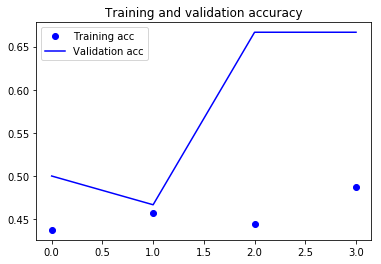

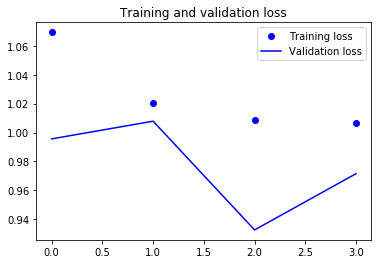

In [25]:
# Your code here; visualize the training / validation history associated with fitting the model
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
# Save model
model.save('vgg19_3breeds_4epochs_WORK.h5')

## Final Model Evaluation

Now that you've trained and validated the model, perform a final evaluation of the model on the test set.

In [28]:
# Your code here
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(240,240),
    batch_size=20,
    class_mode='categorical',
    shuffle=False)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=54)
y_hat_test = model.predict_generator(test_generator, steps=54)
print('Generated {} predictions'.format(len(y_hat_test)))
print('test acc:', test_acc)

Found 30 images belonging to 3 classes.
Generated 810 predictions
test acc: 0.6666666865348816


## Summary

Congratulations! In this lab, you brought all of your prior deep learning skills together from preprocessing including one-hot encoding, to adapting a pretrained model. There are always ongoing advancements in CNN architectures and best practices, but you have a solid foundation and understanding at this point.